<a href="https://colab.research.google.com/github/elsachang/capstone498/blob/main/Covid_19_JH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  

#set style & figure inline
sns.set()
%matplotlib inline

In [ ]:
# Datasets
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = url+ 'time_series_covid19_recovered_global.csv'

# datasets as pd pandas dataframes
confirmed = pd.read_csv(confirmed_cases_data_url)
deaths = pd.read_csv(death_cases_data_url)
recovered = pd.read_csv(recovery_cases_data_url)


**Confirmed** cases of COVID-19 as of April 29, 2021


In [ ]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431


In [ ]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 468 entries, Province/State to 4/29/21
dtypes: float64(2), int64(464), object(2)
memory usage: 1005.6+ KB


In [ ]:
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21
count,273.000000,273.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02
mean,20.534804,23.028143,2.025455,2.381818,3.421818,5.210909,7.701818,10.643636,20.283636,22.425455,29.945455,36.098182,43.774545,61.043636,72.316364,86.901818,100.520000,112.010909,125.076364,135.018182,146.036364,155.523636,162.949091,164.469091,219.570909,243.305455,251.098182,259.036364,266.436364,273.280000,275.098182,277.134545,279.421818,285.825455,287.207273,289.258182,292.360000,295.912727,300.858182,305.898182,...,4.482761e+05,4.497918e+05,4.516617e+05,4.539657e+05,4.563342e+05,4.586664e+05,4.607922e+05,4.625011e+05,4.641681e+05,4.662345e+05,4.687189e+05,4.713072e+05,4.736117e+05,4.755370e+05,4.775472e+05,4.793275e+05,4.815241e+05,4.840127e+05,4.870667e+05,4.897868e+05,4.922032e+05,4.947150e+05,4.969573e+05,4.997921e+05,5.027631e+05,5.057331e+05,5.088417e+05,5.117073e+05,5.142000e+05,5.167215e+05,5.198285e+05,5.230648e+05,5.263366e+05,5.296015e+05,5.325878e+05,5.352350e+05,5.377178e+05,5.407886e+05,5.440831e+05,5.473471e+05
std,25.194592,73.596166,26.830287,26.928190,33.524534,46.659184,65.206845,87.856574,215.590294,216.912048,298.915828,354.393099,436.099056,677.718191,819.267697,1009.708544,1189.864721,1337.565823,1508.892710,1638.433622,1790.952650,1917.333731,2016.086930,2016.425426,2909.329166,3282.740532,3393.831693,3510.321618,3619.202616,3721.214847,3742.272663,3767.022856,3780.352448,3865.998839,3866.039586,3878.346018,3908.458169,3932.812610,3958.023303,3978.164378,...,2.139499e+06,2.144488e+06,2.150420e+06,2.158658e+06,2.166247e+06,2.174026e+06,2.181056e+06,2.186203e+06,2.192190e+06,2.198856e+06,2.206656e+06,2.215209e+06,2.222911e+06,2.229476e+06,2.235100e+06,2.242128e+06,2.249912e+06,2.258921e+06,2.268960e+06,2.278830e+06,2.287563e+06,2.295650e+06,2.304084e+06,2.314655e+06,2.325437e+06,2.336484e+06,2.348518e+06,2.359359e+06,2.369276e+06,2.379901e+06,2.392283e+06,2.405482e+06,2.418723e+06,2.432565e+06,2.446011e+06,2.457756e+06,2.469378e+06,2.483417e+06,2.498483e+06,2.513726e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,

In [ ]:
confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21
270,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2572,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692,2693,2705,2714,2733,2758,2772,2781,2785,2791,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,223638,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897,268132,270856,272767,274690,276407,278135,279753,280741,282270,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3418,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276,5357,5446,5507,5582,5657,5715,5770,5812,5858,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86449,86535,86779,86993,87318,87583,87583,87872,88012,88199,88418,88549,88730,88800,88930,89009,89071,89386,89592,89783,89918,90029,90064,90218,90389,90532,90750,90844,90918,90942,91042,91119,91189,91251,91317,91358,91378,91418,91484,91533
274,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36665,36684,36717,36749,36778,36805,36818,36822,36839,36839,36882,36896,36903,36911,36923,36934,36966,36984,37052,37147,37273,37288,37307,37330,37369,37422,37534,37699,37751,37859,37875,37980,38018,38045,38064,38086,38102,38164,38191,38235


In [ ]:
# separate the data into new datasets for each country
# apply the function of "sum" for each new dataset
# combine datasets into a new data frame
# group by region
# we do not find lat, long useful in the analysis, so these two will be dropped

confirmed_country = confirmed.groupby(['Country/Region']).sum().drop(['Lat','Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431


In [ ]:
# see a list of countries included in the datasets

confirmed_country.index


Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=192)

In [ ]:
# total number of countries
len(confirmed_country)


192

In [ ]:
# we want index the data by date in order to visualize easily, so we have to transpose between countres and dates

confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [ ]:
# we want to check the dates of the data collected
# the result shows the date range is from 1/22/20 - 6/2/20

confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/20/21', '4/21/21', '4/22/21', '4/23/21', '4/24/21', '4/25/21',
       '4/26/21', '4/27/21', '4/28/21', '4/29/21'],
      dtype='object', length=464)

In [ ]:

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29'],
              dtype='datetime64[ns]', length=464, freq=None)

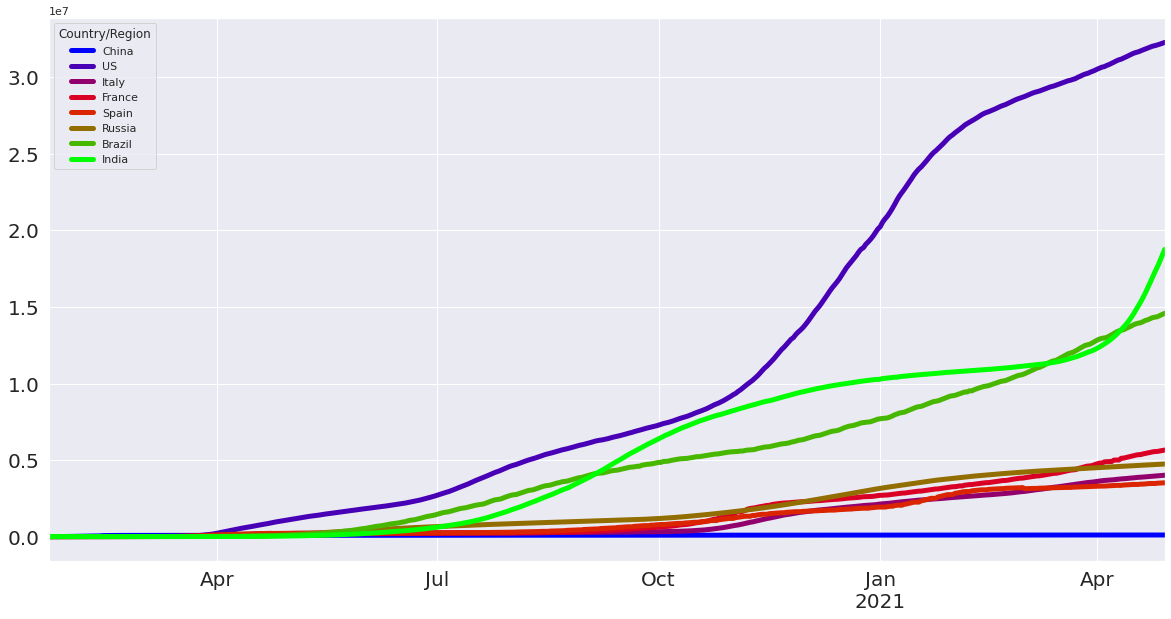

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Russia', 'Brazil','India']
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

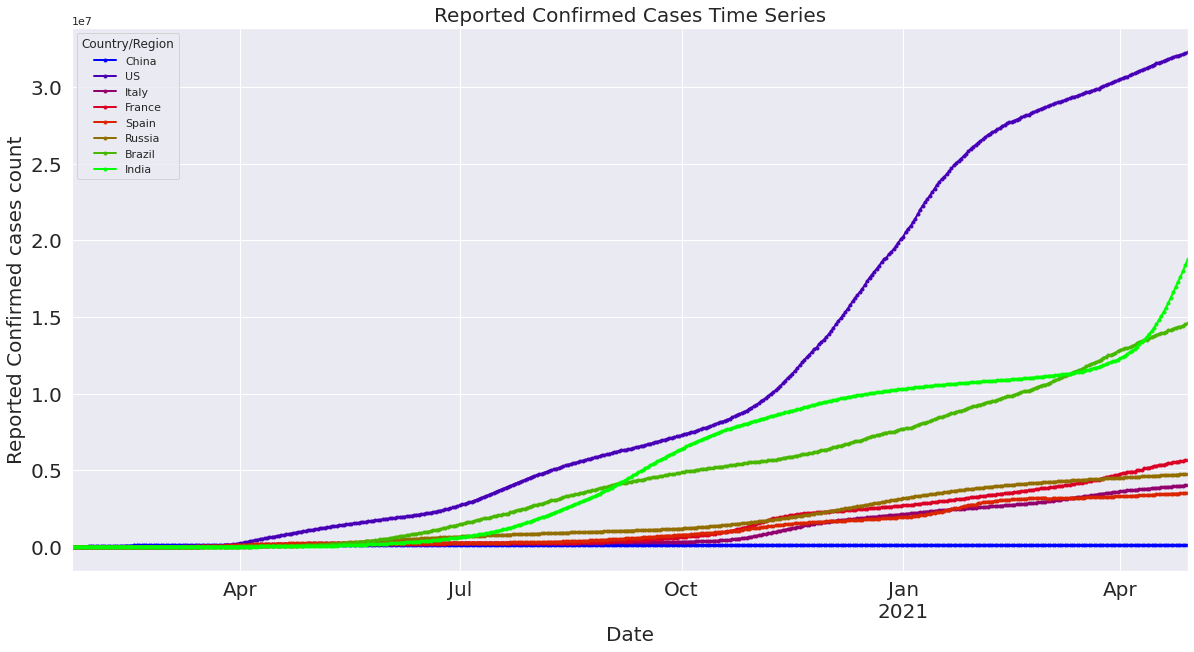

In [ ]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

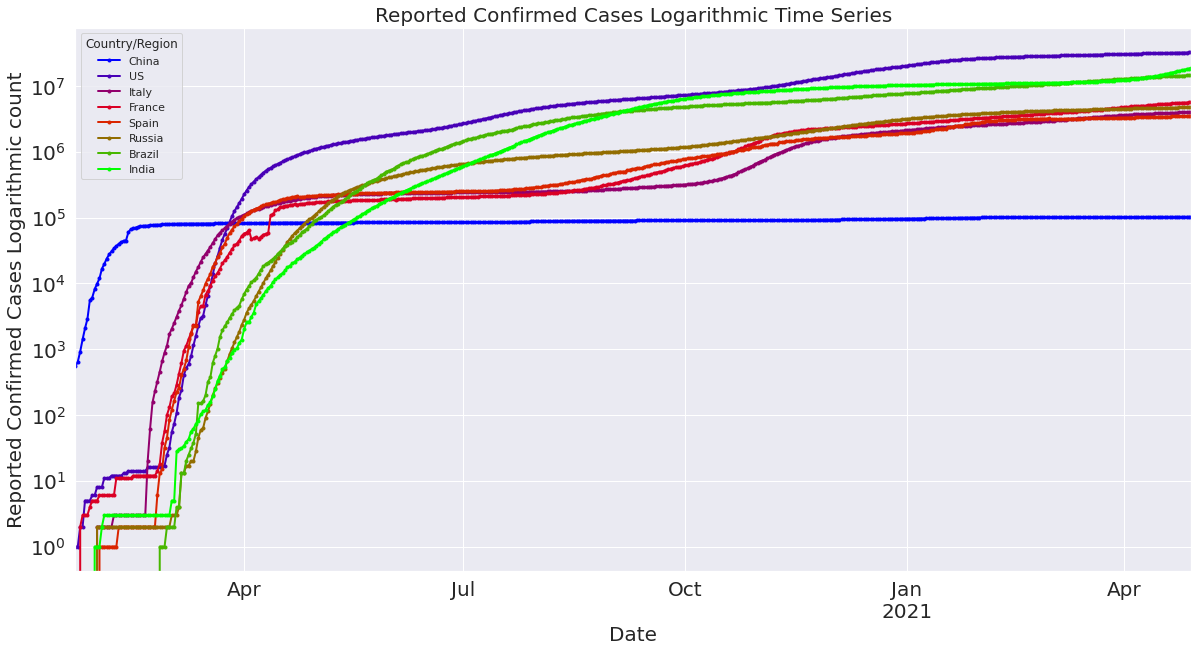

In [ ]:
# we want to make the time series logarithmic so the data is not crammed

confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed Cases Logarithmic count', fontsize=20);
plt.title('Reported Confirmed Cases Logarithmic Time Series', fontsize=20);

In [ ]:
# now we look of the number of deaths in each country
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598,2611,2618
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383,2386,2389
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096,3099,3102,3105,3108,3112,3116,3119,3123,3126,3130,3134,3137,3141,3144,3148,3152,3155,3160,3165,3172,3181,3190,3198,3207,3217,3225,3234,3244
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,114,114,114,115,115,115,115,115,115,116,117,117,117,117,119,120,120,120,120,121,121,121,121,123,123,123,123,123,123,123,123,124,124,124,124,125,125
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,527,530,530,532,532,532,533,533,534,536,537,538,538,540,542,543,547,547,549,549,550,553,554,554,557,557,560,561,561,563,565,570,572,574,577,579,583,587,591,594


In [ ]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 468 entries, Province/State to 4/29/21
dtypes: float64(2), int64(464), object(2)
memory usage: 1005.6+ KB


In [ ]:
# transform the deaths data

deaths_country = deaths.groupby(['Country/Region']).sum().drop(['Lat','Long'], axis=1)

deaths_country = deaths_country.transpose()

datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


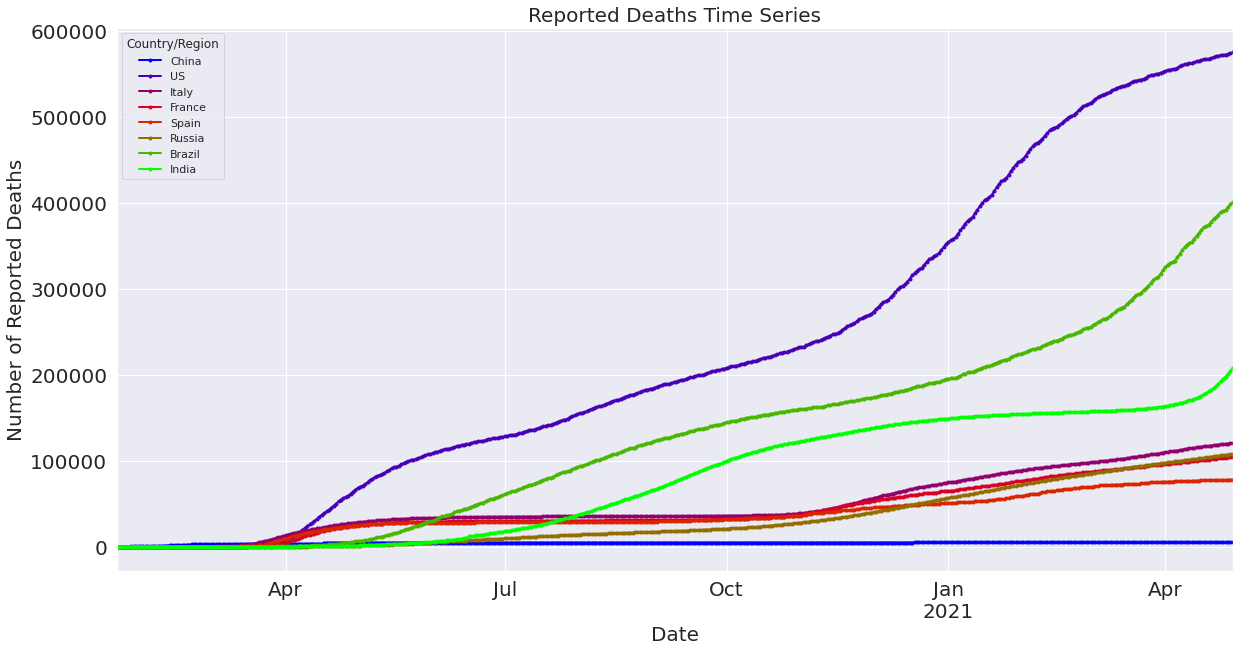

In [ ]:
# plot time series for Deaths
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

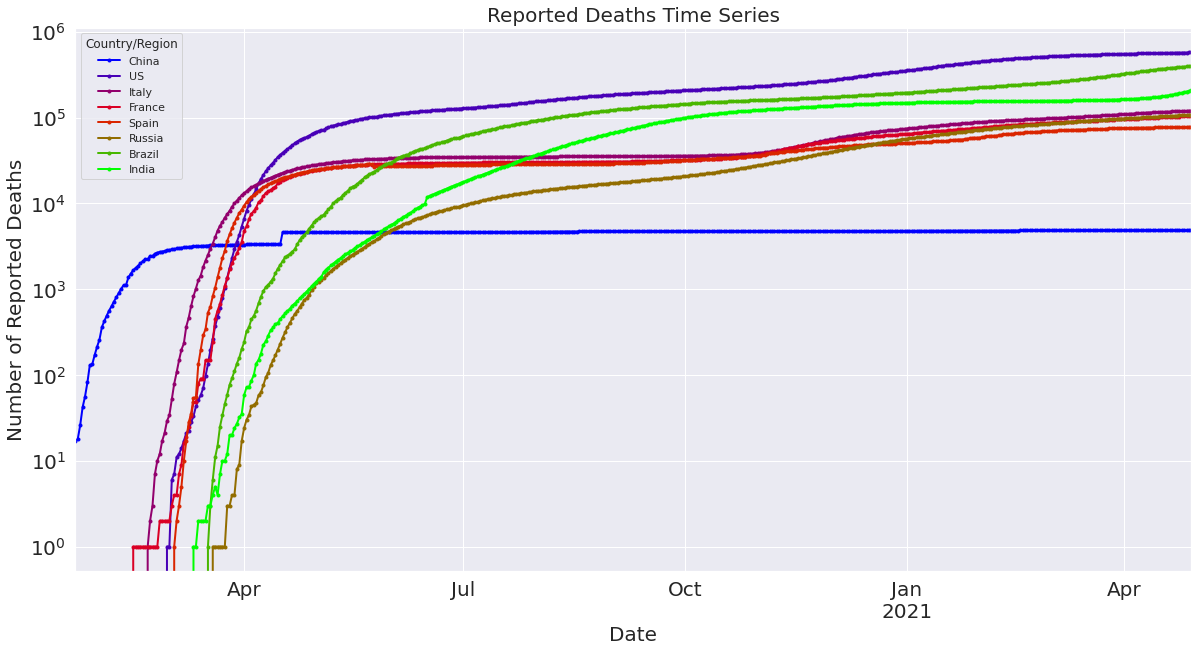

In [ ]:
# with log

deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, colormap='brg', logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

In [ ]:
# aligning growth curves - to all start on the day when the number of known dealths is more than 30. for death tolls less than 30, we set the values to NaN.
# so they are not included in the plot.

for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 30),col] = None

# Check out tail
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-04-25,2582.0,2378.0,3207.0,124.0,579.0,31.0,61644.0,4018.0,910.0,10087.0,4371.0,196.0,624.0,11053.0,44.0,2493.0,24024.0,321.0,97.0,NaN,12824.0,8203.0,691.0,390797.0,NaN,15907.0,156.0,3206.0,NaN,203.0,74.0,991.0,23950.0,85.0,169.0,25856.0,4845.0,71351.0,146.0,144.0,...,6227.0,NaN,79.0,30.0,11495.0,4208.0,NaN,698.0,54148.0,114.0,77591.0,642.0,2300.0,198.0,13923.0,10570.0,1537.0,NaN,90.0,NaN,140.0,NaN,121.0,159.0,10304.0,38358.0,572266.0,341.0,44121.0,1571.0,127681.0,2326.0,643.0,NaN,2047.0,35.0,3167.0,1187.0,1246.0,1557.0
2021-04-26,2592.0,2379.0,3217.0,124.0,583.0,32.0,62087.0,4040.0,910.0,10098.0,4402.0,198.0,625.0,11150.0,44.0,2502.0,24065.0,322.0,97.0,NaN,12861.0,8350.0,691.0,391936.0,NaN,16101.0,156.0,3207.0,NaN,208.0,79.0,991.0,24011.0,85.0,169.0,25975.0,4845.0,71799.0,146.0,144.0,...,6257.0,NaN,79.0,30.0,11531.0,4214.0,NaN,702.0,54186.0,114.0,77738.0,647.0,2340.0,201.0,13923.0,10583.0,1548.0,NaN,90.0,NaN,148.0,NaN,122.0,159.0,10352.0,38711.0,572740.0,341.0,44323.0,1573.0,127688.0,2391.0,645.0,NaN,2065.0,35.0,3184.0,1205.0,1248.0,1560.0
2021-04-27,2598.0,2383.0,3225.0,124.0,587.0,32.0,62599.0,4058.0,910.0,10126.0,4429.0,198.0,626.0,11228.0,44.0,2512.0,24104.0,322.0,97.0,NaN,12885.0,8418.0,702.0,395022.0,NaN,16182.0,156.0,3207.0,NaN,211.0,82.0,991.0,24048.0,87.0,170.0,26020.0,4845.0,72235.0,146.0,144.0,...,6286.0,NaN,79.0,30.0,11572.0,4221.0,NaN,713.0,54237.0,114.0,77855.0,647.0,2349.0,201.0,13968.0,10591.0,1559.0,NaN,90.0,NaN,163.0,NaN,122.0,161.0,10444.0,39057.0,573381.0,341.0,44763.0,1578.0,127705.0,2452.0,646.0,NaN,2082.0,35.0,3201.0,1207.0,1249.0,1565.0
2021-04-28,2611.0,2386.0,3234.0,125.0,591.0,32.0,62947.0,4071.0,910.0,10152.0,4461.0,198.0,632.0,11305.0,44.0,2522.0,24140.0,323.0,99.0,NaN,12920.0,8464.0,702.0,398185.0,NaN,16278.0,157.0,3209.0,NaN,213.0,88.0,991.0,24110.0,87.0,170.0,26073.0,4845.0,72725.0,146.0,144.0,...,6312.0,NaN,79.0,30.0,11611.0,4236.0,NaN,713.0,54285.0,114.0,77943.0,661.0,2349.0,201.0,14000.0,10617.0,1572.0,NaN,90.0,NaN,178.0,NaN,122.0,163.0,10563.0,39398.0,574340.0,341.0,45211.0,1580.0,127734.0,2497.0,646.0,NaN,2099.0,35.0,3206.0,1216.0,1249.0,1565.0
2021-04-29,2618.0,2389.0,3244.0,125.0,594.0,32.0,63508.0,4087.0,910.0,10179.0,4490.0,198.0,639.0,11393.0,44.0,2532.0,24185.0,323.0,99.0,NaN,12920.0,8512.0,712.0,401186.0,NaN,16368.0,157.0,3209.0,NaN,213.0,91.0,1107.0,24165.0,88.0,170.0,26247.0,4845.0,73230.0,146.0,144.0,...,6337.0,NaN,79.0,30.0,11647.0,4243.0,NaN,713.0,54331.0,114.0,78080.0,661.0,2349.0,201.0,14002.0,10625.0,1583.0,NaN,90.0,NaN,188.0,NaN,123.0,165.0,10641.0,39737.0,575194.0,342.0,45607.0,1584.0,127759.0,2563.0,647.0,NaN,2117.0,35.0,3231.0,1222.0,1250.0,1567.0


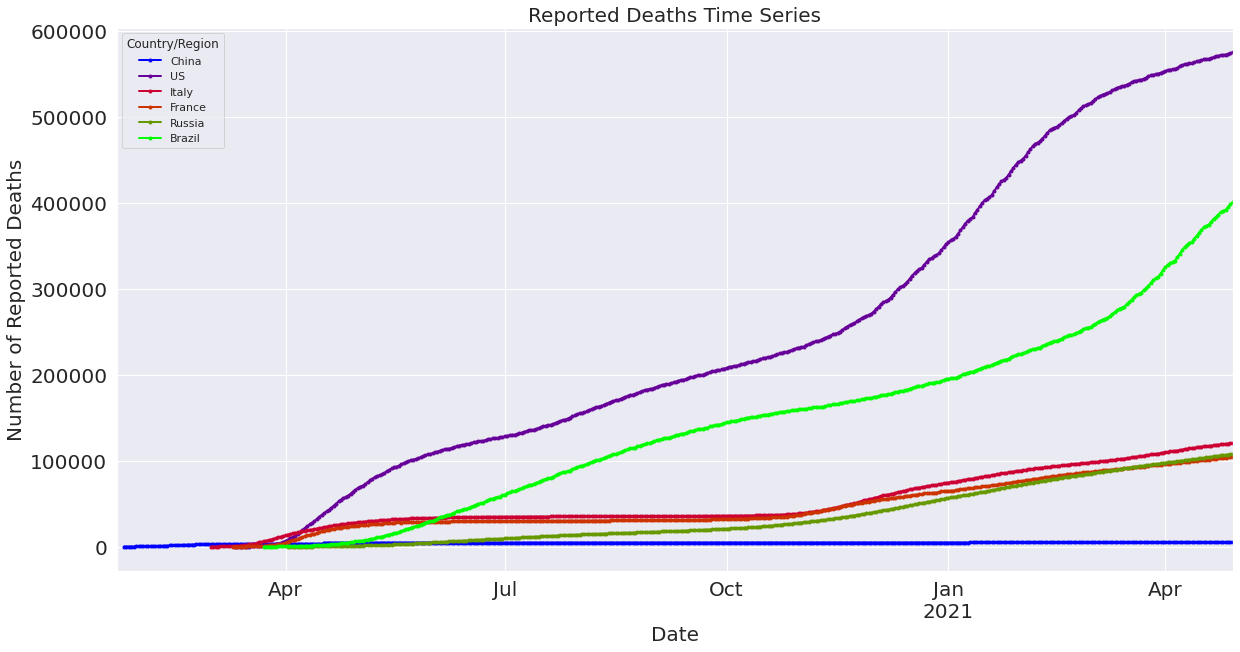

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Russia','Brazil']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

In [ ]:
# remove countries that have less than 30 deaths
deaths_country.dropna(axis=1, how='all', inplace=True)
deaths_country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 464 entries, 2020-01-22 to 2021-04-29
Columns: 167 entries, Afghanistan to Zimbabwe
dtypes: float64(167)
memory usage: 609.0 KB


In [ ]:
# sort index, drop date column
deaths_country_drop = deaths_country.reset_index().drop(['index'], axis=1)
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burma,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,...,Rwanda,Saint Lucia,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Tajikistan,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


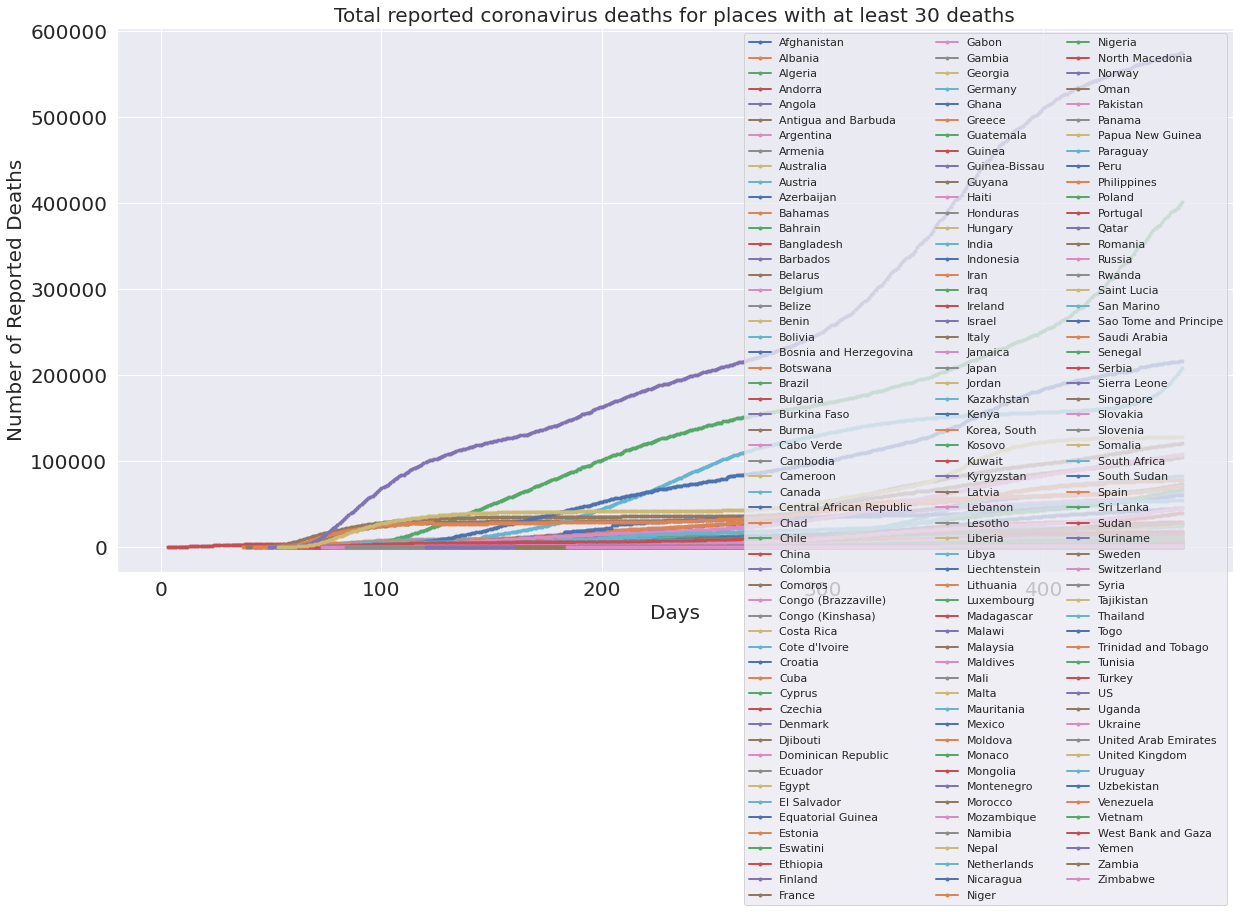

In [ ]:
# Plot time series 
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 30 deaths', fontsize=20);

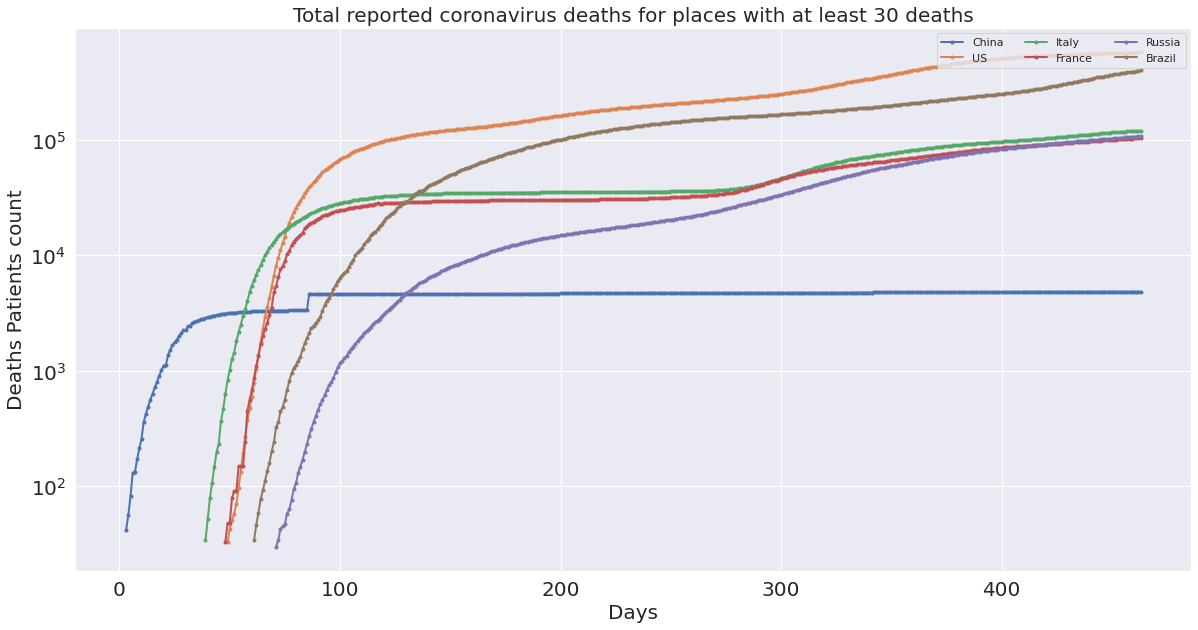

In [ ]:
# log time series
ax = deaths_country_drop[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 30 deaths', fontsize=20);

Let's look at people who have recovered from the virus

In [ ]:
# Function for grouping countries by region
def group_by_country(recovered):
    """Returns data for countries indexed by date"""
    # Group by
    data = recovered.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [ ]:
recovered_country = group_by_country(recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-06-05,1762,910,6453,741,21,20,6088,3513,6688,15742,3871,55,8585,12804,81,22066,16112,16,151,11,1739,1968,23,266940,138,1390,760,151,33,239,123,4575,53074,29,657,99358,79420,13670,55,182,...,2276,6931,11,580,24209,1379,1359,418,23088,6,150376,858,1924,9,0,28600,53,429,2491,183,2971,24,240,108,969,133400,491706,82,11815,20337,1228,721,3247,334,307,377,6,23,912,33
2020-06-06,1830,925,6631,741,24,20,6180,3720,6703,15789,4024,62,9056,13325,81,23015,16190,16,151,11,1902,1968,23,277149,138,1545,765,156,45,240,123,4587,54087,37,672,103817,79424,13670,67,210,...,2512,11056,11,600,24559,1379,1359,431,24258,6,150376,891,2014,9,0,28700,58,429,2583,183,2971,24,240,108,977,135322,500849,82,12265,21061,1230,726,3268,385,307,400,6,23,912,33
2020-06-07,1875,938,6717,744,24,20,6909,4014,6706,15793,4149,62,9468,13903,81,23647,16291,16,151,11,2086,1968,23,283952,138,1548,765,156,45,240,123,4735,54675,38,672,108150,79434,14414,67,210,...,2588,11348,11,608,24886,1389,1359,441,24364,6,150376,941,2014,9,0,28700,58,430,2673,183,2972,24,248,108,982,137969,506367,96,12513,21806,1239,730,3354,487,307,403,6,23,912,34
2020-06-08,2171,945,6799,751,38,20,7305,4099,6720,15839,4377,64,10326,14560,81,23880,16315,16,186,14,2159,2023,24,378257,138,1587,765,159,45,266,123,4748,55343,38,685,112248,79444,16459,67,210,...,2699,11189,11,611,25368,1396,1359,470,26099,15,150376,990,2059,9,0,28700,62,430,2763,183,2973,24,251,109,982,141380,518522,103,12657,22275,1255,738,3357,487,316,404,6,23,912,46
2020-06-09,2651,960,6951,757,38,20,7568,4451,6740,15875,4606,64,10606,15337,81,24506,16324,16,188,17,2190,2049,24,396737,138,1623,765,159,45,270,125,4794,56117,38,706,117361,79451,16459,67,221,...,2809,11268,11,621,25877,1402,1359,489,29006,15,150376,1057,2127,9,0,28700,62,431,2815,183,2973,24,260,109,982,144598,524855,118,12892,22740,1257,754,3459,487,316,404,6,23,912,46


In [ ]:
# function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [ ]:
# function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

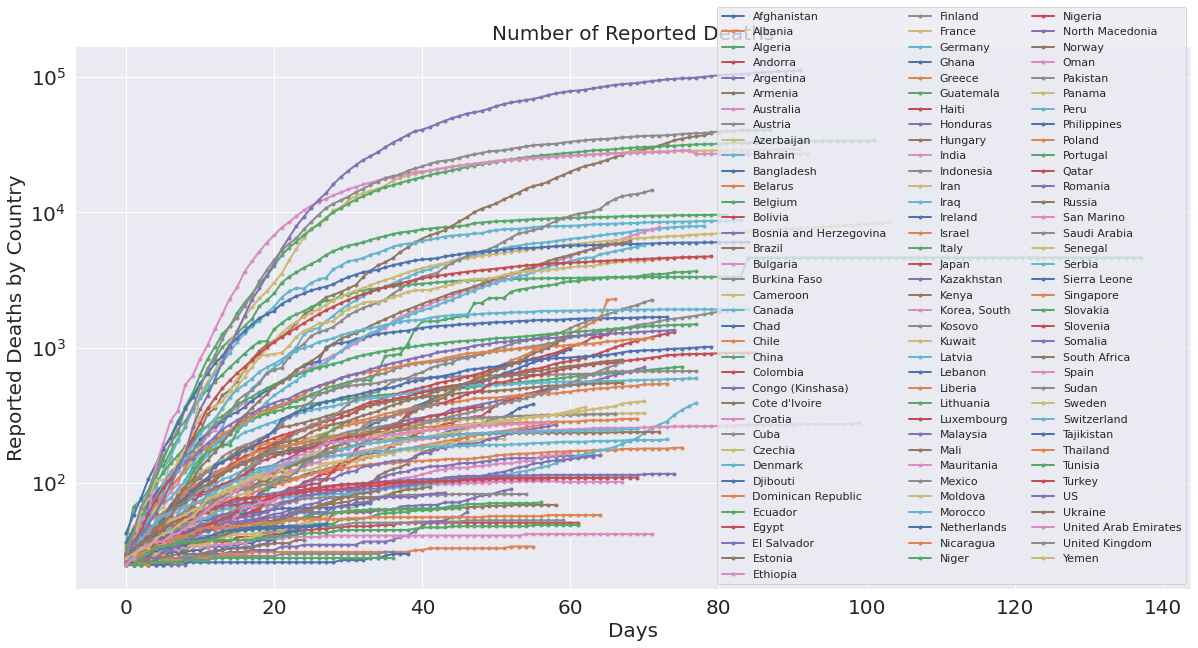

In [ ]:
# number of reported deaths in all countries
deaths_country_drop = group_by_country(deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=25)
plot_time_series(deaths_country_drop, 'Number of Reported Deaths', 'Days', 'Reported Deaths by Country', logy=True)

In [ ]:

# group by country and check out tail
recovered_country = group_by_country(recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-06-05,1762,910,6453,741,21,20,6088,3513,6688,15742,3871,55,8585,12804,81,22066,16112,16,151,11,1739,1968,23,266940,138,1390,760,151,33,239,123,4575,53074,29,657,99358,79420,13670,55,182,...,2276,6931,11,580,24209,1379,1359,418,23088,6,150376,858,1924,9,0,28600,53,429,2491,183,2971,24,240,108,969,133400,491706,82,11815,20337,1228,721,3247,334,307,377,6,23,912,33
2020-06-06,1830,925,6631,741,24,20,6180,3720,6703,15789,4024,62,9056,13325,81,23015,16190,16,151,11,1902,1968,23,277149,138,1545,765,156,45,240,123,4587,54087,37,672,103817,79424,13670,67,210,...,2512,11056,11,600,24559,1379,1359,431,24258,6,150376,891,2014,9,0,28700,58,429,2583,183,2971,24,240,108,977,135322,500849,82,12265,21061,1230,726,3268,385,307,400,6,23,912,33
2020-06-07,1875,938,6717,744,24,20,6909,4014,6706,15793,4149,62,9468,13903,81,23647,16291,16,151,11,2086,1968,23,283952,138,1548,765,156,45,240,123,4735,54675,38,672,108150,79434,14414,67,210,...,2588,11348,11,608,24886,1389,1359,441,24364,6,150376,941,2014,9,0,28700,58,430,2673,183,2972,24,248,108,982,137969,506367,96,12513,21806,1239,730,3354,487,307,403,6,23,912,34
2020-06-08,2171,945,6799,751,38,20,7305,4099,6720,15839,4377,64,10326,14560,81,23880,16315,16,186,14,2159,2023,24,378257,138,1587,765,159,45,266,123,4748,55343,38,685,112248,79444,16459,67,210,...,2699,11189,11,611,25368,1396,1359,470,26099,15,150376,990,2059,9,0,28700,62,430,2763,183,2973,24,251,109,982,141380,518522,103,12657,22275,1255,738,3357,487,316,404,6,23,912,46
2020-06-09,2651,960,6951,757,38,20,7568,4451,6740,15875,4606,64,10606,15337,81,24506,16324,16,188,17,2190,2049,24,396737,138,1623,765,159,45,270,125,4794,56117,38,706,117361,79451,16459,67,221,...,2809,11268,11,621,25877,1402,1359,489,29006,15,150376,1057,2127,9,0,28700,62,431,2815,183,2973,24,260,109,982,144598,524855,118,12892,22740,1257,754,3459,487,316,404,6,23,912,46


In [ ]:
# align curves and check out head
recovered_country_drop = align_curves(recovered_country, min_val=25)
recovered_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,...,Romania,Russia,Rwanda,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
0,29.0,31.0,32.0,26.0,38.0,52.0,28.0,26.0,112.0,26.0,25.0,35.0,25.0,25.0,29.0,31.0,27.0,26.0,27.0,120.0,25.0,25.0,31.0,27.0,33.0,33.0,25.0,43.0,110.0,29.0,33.0,43.0,28.0,31.0,26.0,25.0,25.0,29.0,25.0,37.0,...,25.0,29.0,25.0,25.0,27.0,68.0,28.0,27.0,534.0,29.0,29.0,107.0,70.0,31.0,31.0,30.0,27.0,31.0,131.0,27.0,26.0,641.0,48.0,28.0,25.0,28.0,25.0,26.0,105.0,28.0,25.0,26.0,53.0,41.0,25.0,31.0,25.0,25.0,25.0,25.0
1,32.0,31.0,32.0,31.0,38.0,52.0,30.0,26.0,225.0,26.0,NaN,35.0,25.0,25.0,29.0,31.0,27.0,31.0,30.0,127.0,34.0,30.0,32.0,27.0,33.0,37.0,34.0,60.0,183.0,37.0,33.0,61.0,30.0,39.0,26.0,25.0,26.0,30.0,37.0,45.0,...,25.0,38.0,42.0,NaN,35.0,68.0,29.0,27.0,637.0,37.0,34.0,113.0,70.0,31.0,31.0,30.0,33.0,32.0,131.0,27.0,26.0,470.0,48.0,28.0,25.0,37.0,25.0,26.0,121.0,38.0,28.0,31.0,67.0,62.0,25.0,39.0,55.0,NaN,28.0,25.0
2,32.0,33.0,32.0,39.0,NaN,63.0,30.0,26.0,225.0,26.0,NaN,44.0,25.0,30.0,32.0,NaN,27.0,31.0,30.0,127.0,38.0,34.0,46.0,31.0,33.0,37.0,35.0,60.0,184.0,38.0,39.0,75.0,36.0,55.0,26.0,25.0,26.0,42.0,41.0,52.0,...,52.0,45.0,49.0,NaN,35.0,68.0,33.0,40.0,753.0,43.0,34.0,151.0,79.0,34.0,31.0,32.0,38.0,39.0,131.0,27.0,28.0,470.0,48.0,28.0,29.0,48.0,25.0,42.0,147.0,38.0,28.0,31.0,67.0,68.0,25.0,39.0,58.0,42.0,30.0,25.0
3,32.0,44.0,65.0,52.0,NaN,72.0,30.0,88.0,479.0,26.0,NaN,44.0,26.0,31.0,32.0,263.0,27.0,31.0,47.0,127.0,45.0,37.0,50.0,37.0,33.0,38.0,50.0,98.0,256.0,38.0,39.0,156.0,39.0,55.0,27.0,26.0,27.0,49.0,41.0,67.0,...,64.0,49.0,54.0,NaN,40.0,68.0,35.0,45.0,870.0,54.0,37.0,167.0,79.0,44.0,31.0,32.0,42.0,46.0,131.0,27.0,28.0,1089.0,48.0,31.0,29.0,48.0,25.0,70.0,176.0,45.0,28.0,38.0,67.0,86.0,30.0,39.0,63.0,44.0,30.0,25.0
4,32.0,52.0,65.0,58.0,NaN,72.0,30.0,88.0,636.0,32.0,25.0,60.0,30.0,31.0,32.0,263.0,27.0,37.0,68.0,127.0,52.0,39.0,50.0,43.0,33.0,38.0,50.0,98.0,466.0,38.0,39.0,156.0,49.0,85.0,27.0,26.0,35.0,56.0,48.0,67.0,...,64.0,64.0,60.0,NaN,40.0,68.0,37.0,55.0,977.0,54.0,37.0,175.0,102.0,61.0,31.0,183.0,44.0,52.0,131.0,27.0,28.0,1223.0,48.0,31.0,32.0,53.0,43.0,105.0,178.0,46.0,35.0,38.0,67.0,93.0,30.0,39.0,75.0,44.0,30.0,28.0


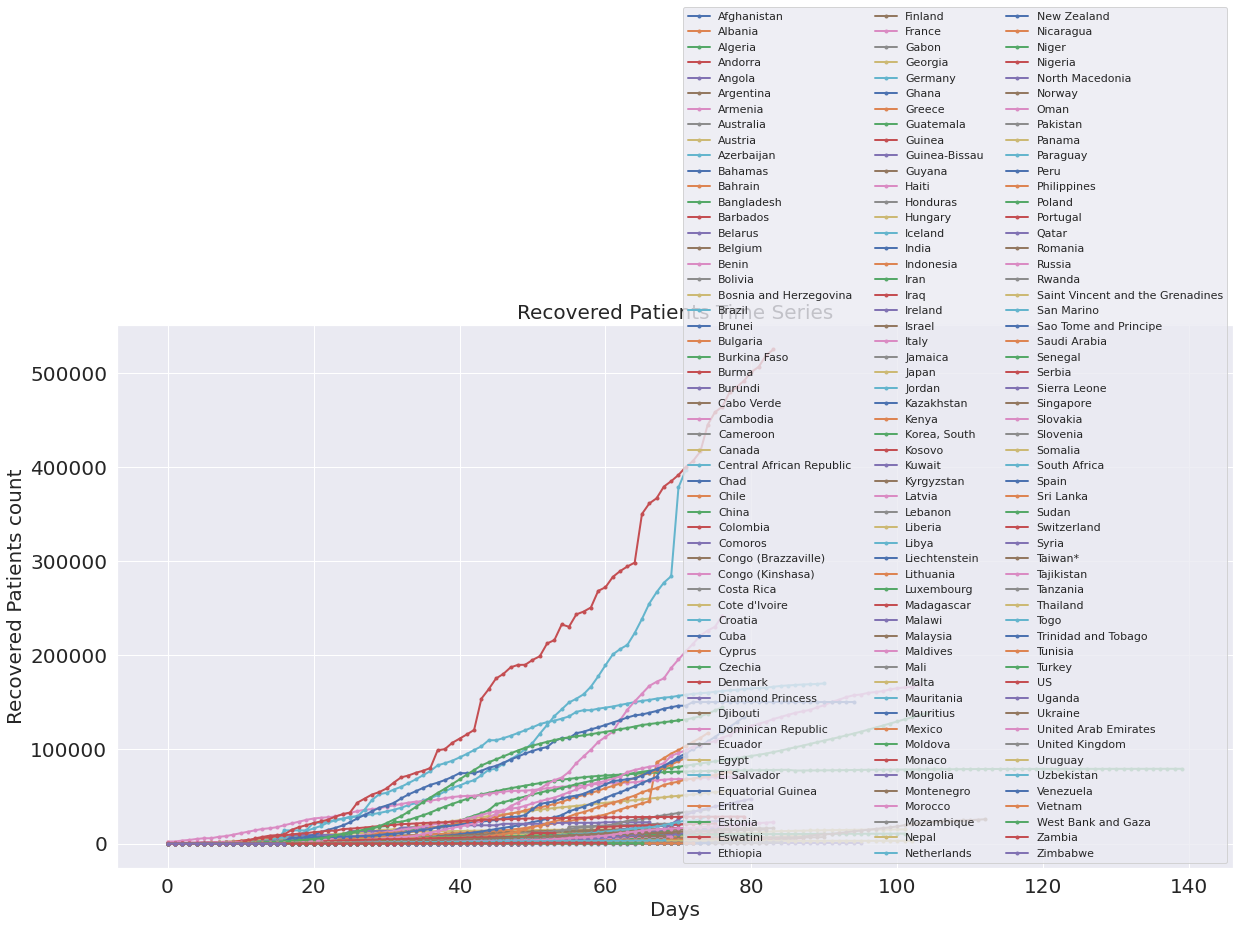

In [ ]:
#plot time series
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count')

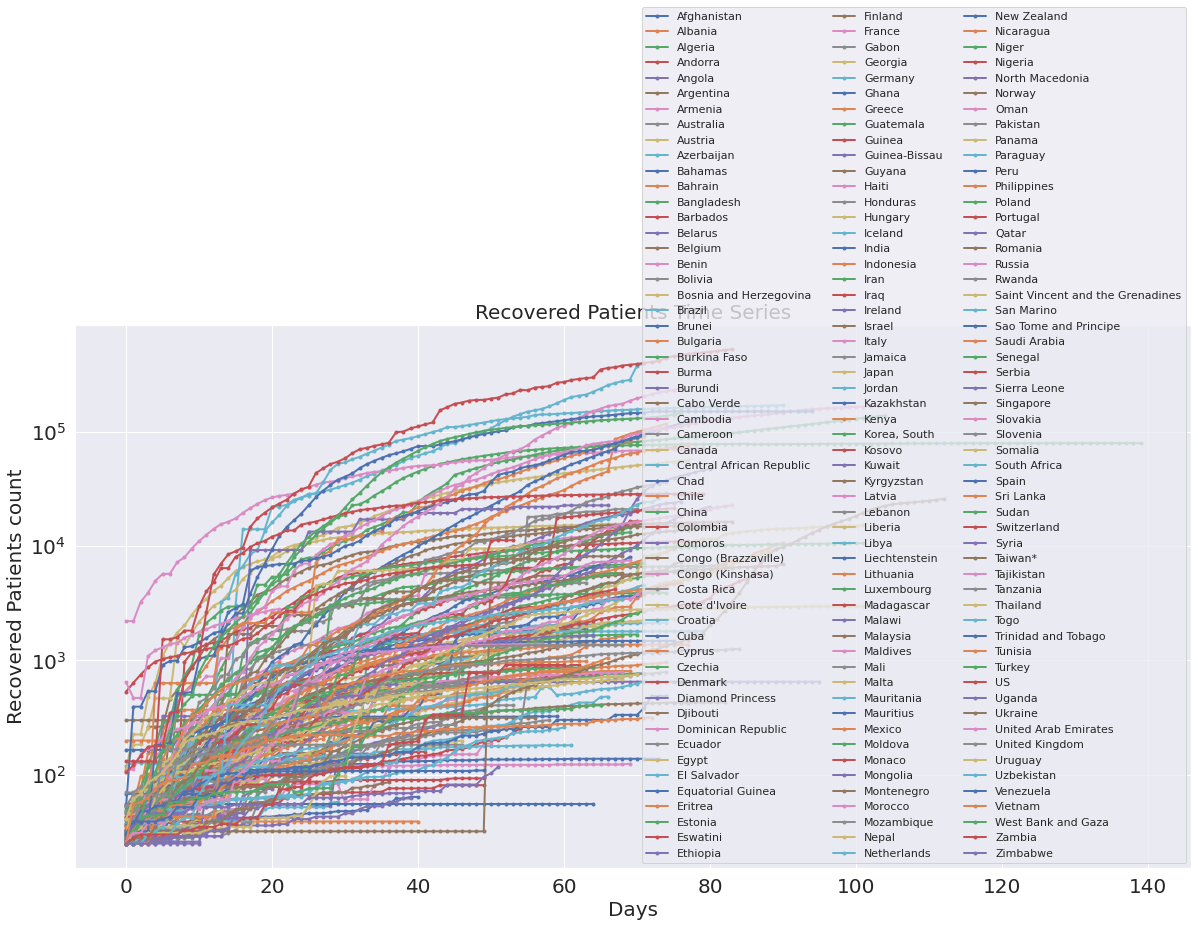

In [ ]:
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)


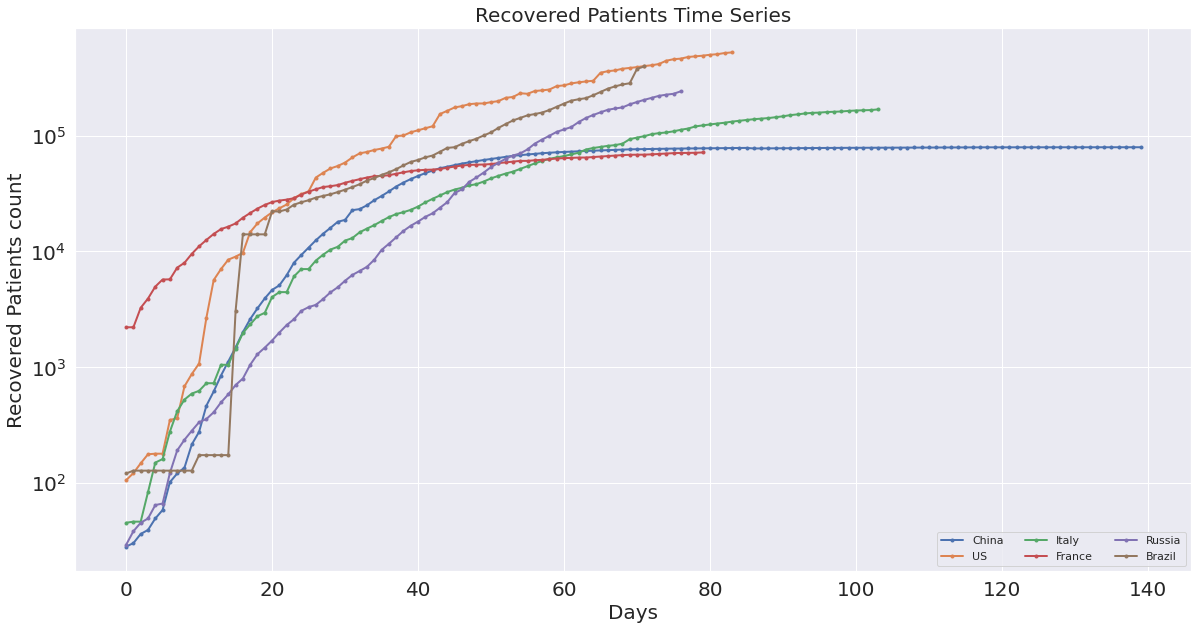

In [ ]:
plot_time_series(recovered_country_drop[poi], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

In [ ]:
deaths_country.sum().head

<bound method NDFrame.head of Country/Region
Afghanistan           586669.0
Albania               302467.0
Algeria               733383.0
Andorra                27974.0
Angola                 95617.0
                        ...   
Vietnam                 8621.0
West Bank and Gaza    338077.0
Yemen                 198943.0
Zambia                167517.0
Zimbabwe              189067.0
Length: 167, dtype: float64>

In [ ]:
recovered_country.sum().head

NameError: ignored

In [ ]:
df1 = pd.DataFrame(columns=("Country","Death Rate"))
for (columnNameR, columnDataR) in recovered_country.iteritems():
    for (columnNameD, columnDataD) in deaths_country.iteritems():
      if columnNameR == columnNameD:
            df1 = df1.append({'Country': columnNameD, 'Death Rate': round((columnDataD.values[len(columnDataD)-1])/(columnDataR.values[len(columnDataR)-1]),3)}, ignore_index=True)
     

In [ ]:
df1

NameError: ignored